In [ ]:
from google.colab import files
files.upload()

Saving iris-species.zip to iris-species.zip


{'iris-species.zip': b'PK\x03\x04\x14\x00\x08\x00\x08\x00\xc3<;I\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x08\x00$\x00Iris.csv\n\x00 \x00\x00\x00\x00\x00\x01\x00\x18\x00\xfeu*\x16\x92\x18\xd2\x01\xfeu*\x16\x92\x18\xd2\x01\xfeu*\x16\x92\x18\xd2\x01\x85WM\x8f\x149\x0c\xbd\xcfo)ZI\xec|\x9d9!\xed\x01\x89\x03g4\xb4\xd8\x96X\x06M\x8f\xf6\xf7\x93\xc4/E\xaa\xed\x82C\x1fZv\x9e\x9d\xe7g;\xf5\xe1\xeb\xf6\xe9\xfa\xf3\xcb\xf7\x7f\xae?\xbe\xbd\xfd\xfb\xfe?\xf9\xf7\xf9\xf6u\xfc\xf9x}[L\xe3\xdf4}\xfay}\xbe]\xefO~\x8b\x17\xbf\xd1%n\xfe\xc2\x9b\xbb\x84\xed\xc3\xeb\xed\xfe\xee~}{\xb9\x7fy\n\x1b_j\xb3:\xd3J\xcd\x9a\x9b54+)+7kjV\xdf\xacQYc\x8b\xeb\x9a5\x99\xc8\xa9Y\xb9Yk\xb3\xe6f\xe5\x835\x03\x99q\x96\x0e\xd6\x02d6\xe3\xd6v\x96\xb70\x90u\\\xefp\xe1\x99\xb4?\x9a=\xf2\xca&\xb6\xeft\x15\x84N\xdaL0O6\x1f\xc0;a\x04\xb3\xd7\xe6\xceXi.\xdd\x1c4x\xa7,\x8f\xcbIjG\xca|^\x18%m.\x0f28R\xea\xeb\x00\xa7\x16_\xeaq4\x07\x87\xd3\x05\xb1\x1f\xcc\x935\xc6\xe9\x07\x8d\x05\x9c\xcef\xe6\x81P\xed\xae\x14\xa7O3N\x13\xc0\xe

In [ ]:
!ls

iris-species.zip  sample_data


In [ ]:
!unzip iris-species.zip

Archive:  iris-species.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [ ]:
!ls

database.sqlite  Iris.csv  iris-species.zip  sample_data


## This notebook demos Python data visualizations, and some classification algorithms on the Iris dataset.

In [ ]:
# importing pandas, and other necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# loading the dataset from the "../input/" directory
iris = pd.read_csv("Iris.csv") # the iris dataset is now a Pandas DataFrame

# exploring the data
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# confirming the number of samples, and of each specie
print (iris['Species'].count())
print (iris['Species'].value_counts())

## Balanced dataset

150
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


Since, each class has equal number of samples. Hence, this dataset is a balanced dataset.

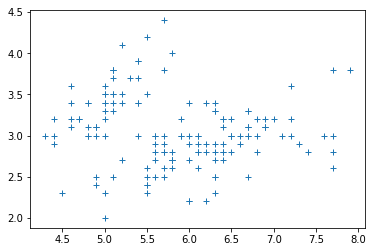

In [ ]:
# creating a scatter plot of features
plt.plot(iris['SepalLengthCm'],iris["SepalWidthCm"],marker='+',linestyle='none')
plt.show()

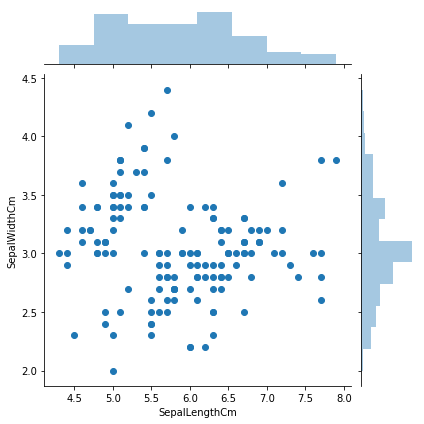

In [ ]:
# using the seaborn library to create a similar plot
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris)

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


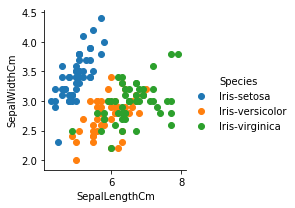

In [ ]:
# using seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="Species") \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

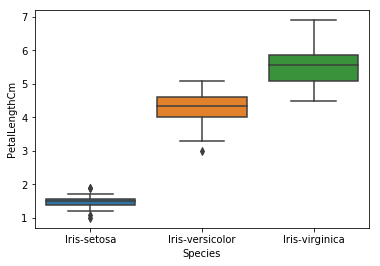

In [ ]:
# the boxplot feature of seaborn is also useful to look at individual features
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

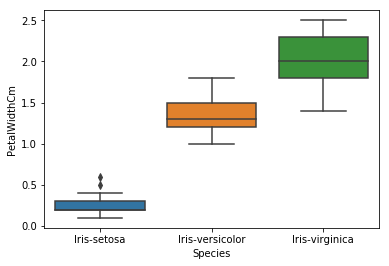

In [ ]:
sns.boxplot(x="Species", y="PetalWidthCm", data=iris)

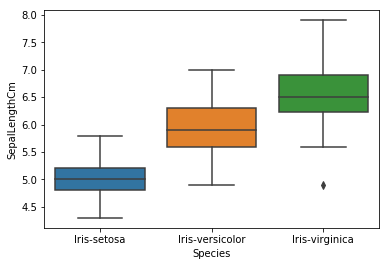

In [ ]:
sns.boxplot(x="Species", y="SepalLengthCm", data=iris)

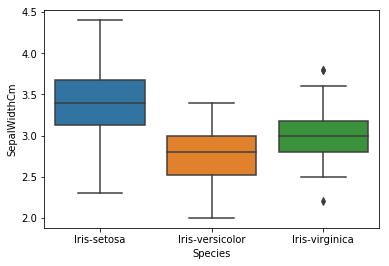

In [ ]:
sns.boxplot(x="Species", y="SepalWidthCm", data=iris)

*early on we can see that using the feature for petal length and width we can easily identify setosa from the other species. *

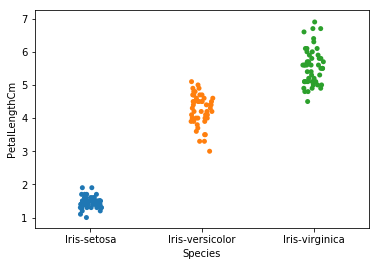

In [ ]:
# using Seaborn's striplot function adds a layer of individual points
# setting jitter=True ensures that not all points fall on the same line
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes (this is neat thing to learn:)
#ax = sns.boxplot(x="Species", ji y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

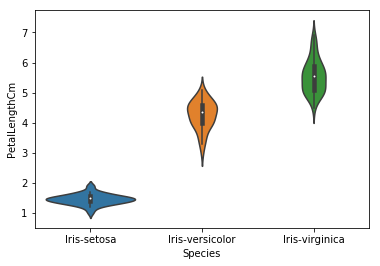

In [ ]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

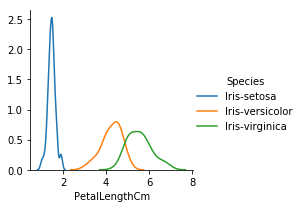

In [ ]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="Species") \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

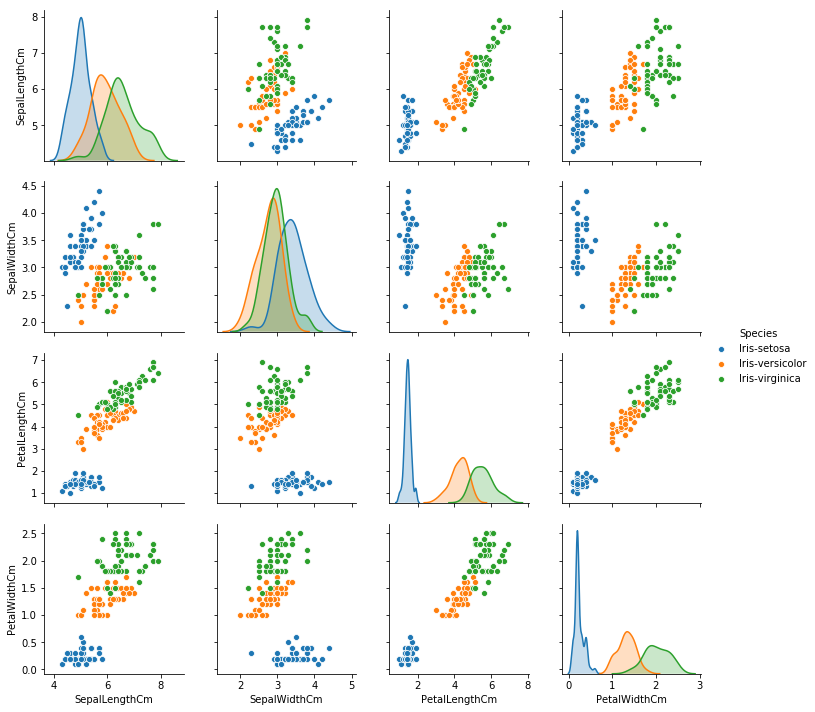

In [ ]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
#
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris.drop("Id", axis=1), hue="Species")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


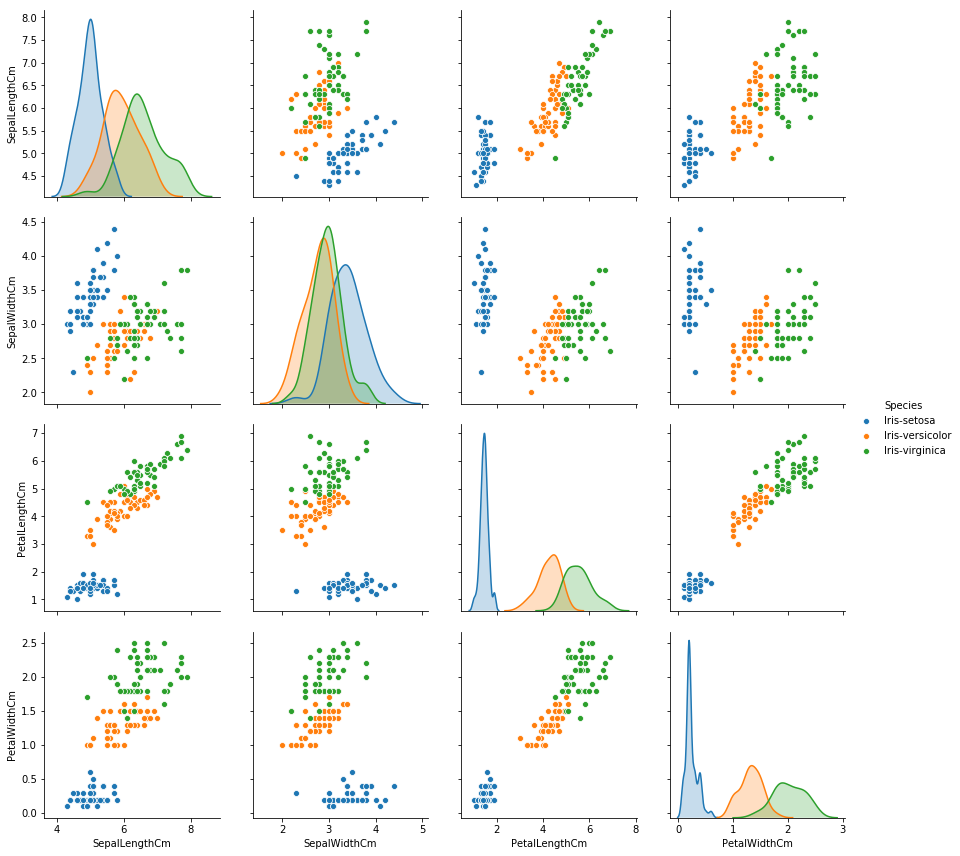

In [ ]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

In [ ]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

*The seaborn plots are much better looking than this. *

In [ ]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.tools.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

ModuleNotFoundError: ignored

In [ ]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

In [ ]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")

*I learned a lot from these plots that Ben produced. I then started to run k-nearest neighbor as my first real machine learning exercise. *

In [ ]:
# importing the module to separate the dataset into a test and train sets.
from sklearn.model_selection import train_test_split

In [ ]:
# Split the iris data set into a train, and test sets
X_train, X_test, y_train, y_test=train_test_split(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']],
                                                 iris['Species'],random_state=0,train_size=0.75)

*I really don't understand the warning above.*

In [ ]:
# exploring the result
print(X_train.head())
print(y_train.head())

In [ ]:
# importing the KNN module, and building the classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) # n_neighbors is the parameter we pass to KNN
knn.fit(X_train, y_train)

In [ ]:
# predicting on the test set
y_pred=knn.predict(X_test)

In [ ]:
# calculating the test score
# to do it, simply compare the predicted values with that of the true values (y_test)
print("Test set score: {:.3f}".format(np.mean(y_pred==y_test)))

In [ ]:
# A simpler way would be to use the score method of the knn object
print("Training set score: {:.3f}".format(knn.score(X_train,y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test,y_test)))

In [ ]:
# Examining the effect of changing the n_neighbors parameter of KNN
for neighbors in range(1,7):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train)
    print ('neighbors: {}'.format(neighbors), "Training set score: {:.3f}".format(knn.score(X_train,y_train)),
           'Test set score: {:.3f}'.format(knn.score(X_test,y_test)) )

*Increasing the number of neighbors did not affect the test set score, but it acutally made the training set score much worse. Interesting.*

*Next, I tried to classify using the petal length and width  as the only parameters. *

In [ ]:
# Split the iris data set into a train, and test sets
X_train2, X_test2, y_train2, y_test2=train_test_split(iris[['PetalLengthCm','PetalWidthCm']],
                                                 iris['Species'],random_state=0,train_size=0.75)

In [ ]:
# exploring the result
print(X_train2.head())
print(y_train2.head())

In [ ]:
for neighbors in range(1,7):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train2, y_train2)
    print ('neighbors: {}'.format(neighbors), "Training set score: {:.3f}".format(knn.score(X_train2,y_train2)),
           'Test set score: {:.3f}'.format(knn.score(X_test2,y_test2)) )

*The result of using only the petal lengths resulted in the same test set score, and only a little worse training set score. *

## Conclusions

* The seaborn package is visually apealling, and easy to use
* K-nearest neighbor is simple enough to implement and in the case of the iris dataset would give a reasonable prediction
* Using the petal length and width features to train the classifier gave almost the same score when training with all features